### 1번

한 화학공정에서 온도와 수율에 관한 실험으로부터 다음과 같은 데이터가 얻어졌다고 하자.

xi = [-5, -4, -3, -2, -1, 0, 1,  2,  3,  4,  5]  
yi = [ 1,  5,  4,  7, 10, 8, 9, 13, 14, 13, 18]

단순 선형 회귀모형  
<img src="https://latex.codecogs.com/svg.image?y_i=\beta_0&plus;\beta_1\cdot&space;x_i&plus;u_i,\;\;i=1,2,\cdots,11,\;\;u_i\sim&space;iid\;N(0,\sigma^2)">  
을 가정하고 다음 물음에 답하여라.

(1) 최소제곱법에 의해서 단순 선형 회귀 모형을 적합하여라.

beta_0: 9.273 
beta_1: 1.436


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0182 -1.1818  0.4182  1.1636  2.1636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2727     0.4632  20.021 9.00e-09 ***
x             1.4364     0.1465   9.807 4.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.536 on 9 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9049 
F-statistic: 96.18 on 1 and 9 DF,  p-value: 4.207e-06


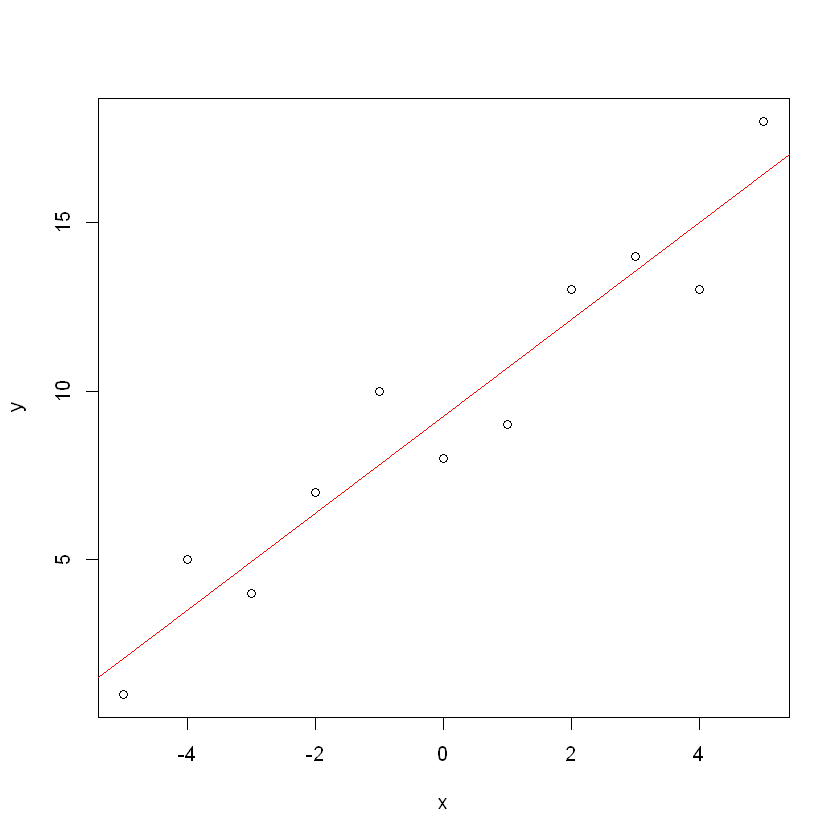

In [10]:
x = c(-5:5)
y = c(1,5,4,7,10,8,9,13,14,13,18)

x_bar = mean(x)
y_bar = mean(y)

S_xy = sum((x-x_bar)*(y-y_bar)) 
S_xx = sum((x-x_bar)^2)

beta_1 = S_xy / S_xx
beta_0 = y_bar - beta_1 * x_bar

cat("beta_0:", round(beta_0, 3), "\n")
cat("beta_1:", round(beta_1, 3))

# 산점도 그리기
plot(x, y)

# lm 함수로 풀 수도 있다.
q1.lm = lm(y~x)
summary(q1.lm)

# 적합된 선 그리기
abline(q1.lm, col = "red")

적합된 단순 선형 회귀 모형은 다음과 같다.  
<img src="https://latex.codecogs.com/svg.image?\hat{y_i}=9.273&plus;1.436\cdot\hat{x_i}">

(2) <img src="https://latex.codecogs.com/svg.image?H_0:\beta_1=0">을 유의수준 α=0.05 하에서 검정하여라.

In [11]:
summary(q1.lm)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0182 -1.1818  0.4182  1.1636  2.1636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2727     0.4632  20.021 9.00e-09 ***
x             1.4364     0.1465   9.807 4.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.536 on 9 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9049 
F-statistic: 96.18 on 1 and 9 DF,  p-value: 4.207e-06


분산분석 결과 P-value가 0.05보다 작은 값이므로 귀무가설은 기각된다.

(3) β1 와 x=3에서의 y 값에 대한 신뢰 구간을 구하여라

<img src="https://latex.codecogs.com/svg.image?\hat{\beta_1}">은 평균이 β이고, 분산이 <img src="https://latex.codecogs.com/svg.image?\frac{\sigma^2}{S_{xx}}">인 정규분포를 따른다.

그러므로 (유의수준 0.05)일 때 <img src="https://latex.codecogs.com/svg.image?\hat{\beta_1}">의 신뢰구간은 다음과 같이 구할 수 있다.

In [12]:
# sigma_sq1: 모델에서 직접 sigma^2 값을 구한다.
sigma_sq1 = summary(q1.lm)$sigma^2
cat("sigma_sq1:", sigma_sq1, "\n")

# sigma_sq2: 직접 잔차의 분산을 계산해서 sigma^2 값을 구한다.
SS_res = sum((y-(beta_0+beta_1*x))^2)
sigma_sq2 = SS_res / 9
cat("sigma_sq2:", sigma_sq2, "\n")

# 두 값은 동일하다.

# S_xx 계산한다.
S_xx = sum((x-x_bar)^2)
cat("S_xx:", S_xx, "\n")

lo_b = qnorm(0.025, mean = beta_1, sd = sqrt(sigma_sq1/S_xx))
up_b = qnorm(0.975, mean = beta_1, sd = sqrt(sigma_sq1/S_xx))

cat("lower_bound:", lo_b, "\n")
cat("upper_bound:", up_b, "\n")

sigma_sq1: 2.359596 
sigma_sq2: 2.359596 
S_xx: 110 
lower_bound: 1.149305 
upper_bound: 1.723422 


In [13]:
input_data = data.frame(x=3)

predict(q1.lm, newdata=input_data, int='c') # prediction of the mean response
predict(q1.lm, newdata=input_data, int='p') # prediction of a future value

,fit,lwr,upr
1,13.58182,12.13764,15.026


,fit,lwr,upr
1,13.58182,9.818767,17.34487


<유의수준 0.05를 전제로>

β1의 신뢰구간은 (1.149 ~ 1.723) 이다.  `

적합된 단순 선형 회귀모형에서 x=3 일 때,  
평균응답 예측의 신뢰 구간은 (12.138 ~ 15.026)  
미래값 예측의 신뢰구간은 (9.819 ~ 17.345) 이다.

### 2번

어떤 공정에서 나오는 제품의 강도가 그 공정의 온도와 압력에 대한 영향을 받는가를 조사하기 위하여 다음의 데이터를 얻었다.

공정온도 x1 = (195, 179, 205, 204, 201, 184, 210, 209)  
공정압력 x2 = (57, 61, 60, 62, 61, 54, 58, 61)  
강도 y = (81.4, 122.2, 101.7, 175.5, 150.3, 64.8, 92.1, 113.8)  

(A) 선형회귀모형, <img src="https://latex.codecogs.com/svg.image?y_i=\beta_0&plus;\beta_1&space;x_{1i}&plus;\beta_2&space;x_{2i}&plus;u_i,\;\;i=1,2,\cdots,8,\;\;u_i\sim^{iid}N(0,\sigma^2)">이 성립된다고 가정하고 데이터로부터 회귀계수를 추정하라.

In [14]:
x1 = c(195, 179, 205, 204, 201, 184, 210, 209)
x2 = c(57, 61, 60, 62, 61, 54, 58, 61)
y = c(81.4, 122.2, 101.7, 175.5, 150.3, 64.8, 92.1, 113.8)

q2.lm = lm(y~x1+x2)
summary(q2.lm)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
      1       2       3       4       5       6       7       8 
 -5.259 -14.757 -18.724  31.186  17.301  11.727  -3.715 -17.759 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -553.9879   196.7146  -2.816   0.0373 *
x1            -0.1799     0.7616  -0.236   0.8226  
x2            11.8549     3.2258   3.675   0.0144 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.61 on 5 degrees of freedom
Multiple R-squared:  0.7481,	Adjusted R-squared:  0.6474 
F-statistic: 7.425 on 2 and 5 DF,  p-value: 0.03184


회귀계수의 값 및 회귀식은 다음과 같다.

<img src="https://latex.codecogs.com/svg.image?\beta_0=-553.988,\;\;\beta_1=-0.180\;\;\beta_2=11.855"> <br>

<img src="https://latex.codecogs.com/svg.image?\hat{y_i}=-553.988-0.180\cdot\hat{x_{1i}}&plus;11.855\cdot\hat{x_{2i}}">


(B) 오차분산이 σ^2=3 이라 하면 Var(b0), Var(b1), Var(b2)와 Cov(b1,b2)는 어떻게 되는가?

우선 행렬 계산을 위해 Y, X, XT를 정의하고, beta_hat을 구하여 계산에 오류가 없는지 확인한다.

In [15]:
Y = matrix(y)
X = cbind(1, x1, x2)
XT = t(X)

beta_hat = solve(XT %*% X) %*% XT %*% Y
beta_hat

,-553.9878686
x1,-0.1799193
x2,11.8549259


lm함수로 추정된 회귀계수 값과 동일하므로 계산에 문제가 없다고 볼 수 있으므로, var_beta_hat를 계산한다.

In [16]:
sigma_sq=3       # 문제에서 주어짐

var_beta_hat = solve(XT %*% X)*sigma_sq
var_beta_hat

,,x1,x2
,248.6249683,-0.403796751,-2.837920471
x1,-0.4037968,0.003726798,-0.005662562
x2,-2.8379205,-0.005662562,0.066856223


<img src="https://latex.codecogs.com/svg.image?Var(\hat{\beta_0})=248.625"> <br>
<img src="https://latex.codecogs.com/svg.image?Var(\hat{\beta_1})=0.00373"> <br>
<img src="https://latex.codecogs.com/svg.image?Var(\hat{\beta_2})=0.0669"> <br>
<img src="https://latex.codecogs.com/svg.image?Cov(\hat{\beta_1}, \hat{\beta_2})=0.00566">


(C) 추정된 회귀계수 b1, b2의 의미는 무엇인가?

b1 = -0.180, b2=11.855 인데,
이는 공정온도 x1이 1증가할 때마다 강도가 0.180 감소하고, 공정압력 x2가 1증가할 때마다 강도가 11.855 증가한다는 의미이다.

(D) 분산분석표를 작성하고 가설 H:b1=b2=0를 유의수준 a=0.05에서 검정하여라

In [17]:
summary(q2.lm)
anova(q2.lm)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
      1       2       3       4       5       6       7       8 
 -5.259 -14.757 -18.724  31.186  17.301  11.727  -3.715 -17.759 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -553.9879   196.7146  -2.816   0.0373 *
x1            -0.1799     0.7616  -0.236   0.8226  
x2            11.8549     3.2258   3.675   0.0144 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.61 on 5 degrees of freedom
Multiple R-squared:  0.7481,	Adjusted R-squared:  0.6474 
F-statistic: 7.425 on 2 and 5 DF,  p-value: 0.03184


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,627.5395,627.5395,1.343975,0.29868460
x2,1,6306.3360,6306.3360,13.506017,0.01436746
Residuals,5,2334.6395,466.9279,NA,NA


summary 함수로 구한 p-value 가 0.03184로 0.05보다 작기 때문에 귀무가설은 기각된다.  
분산분석표로 볼 때 x2 변수의 p-value가 0.0143으로 0.05보다 작기 때문에 역시 귀무가설은 기각됨을 확인할 수 있다.

(E) 다중상관계수(multiple correlation coeffcient) R의 제곱 R^2과 수정된 R의 제곱(adjusted R-squared) Ra^2를 각각 구하여라

In [18]:
summary(q2.lm)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
      1       2       3       4       5       6       7       8 
 -5.259 -14.757 -18.724  31.186  17.301  11.727  -3.715 -17.759 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -553.9879   196.7146  -2.816   0.0373 *
x1            -0.1799     0.7616  -0.236   0.8226  
x2            11.8549     3.2258   3.675   0.0144 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.61 on 5 degrees of freedom
Multiple R-squared:  0.7481,	Adjusted R-squared:  0.6474 
F-statistic: 7.425 on 2 and 5 DF,  p-value: 0.03184


<img src="https://latex.codecogs.com/svg.image?R^2=0.7481,\;\;\;adjusted\;R^2=0.6474">